# Obligatorio de Analisis Predictivo de Series Temporales


## Predicción del Bitcoin

## Estudiantes: Marcelo Guelfi, Ismael Puricelli, Alfredo Rodríguez


In [1]:
#cargo bibliotecas
library(astsa)
library(lubridate)
library(xts)
library(forecast)
library(tseries)

options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas

#ajusto tamaño de gráficas
options(repr.plot.width=15, repr.plot.height=8)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas




## Estructura sugerida (la pueden modificar a gusto)

1. Presentación de la serie de datos. Gráficas.

2. Análisis exploratorio (transformaciones, búsqueda de tendencias o ciclos). Estacionarizacion.

3. Modelos estadísticos (ej ARMA, ARIMA, DLM, lo que se aplique). Análisis detallado y residuos.
    
    1. Modelo a
    2. Modelo b
    ...

4. Proyecciones y/o validacion.


## 1. Presentación de la serie


In [2]:
df = read.csv('BTC-USD.csv', stringsAsFactors = FALSE)

df=na.omit(df)
df$Date=ymd(df$Date)
df$Open=as.numeric(df$Open) #NAs Introduced by Coercion

head(df)

str(df)
summary(df)

# comentarios: siguen apareciendo NAs. Existe el paquete TTR que trae series temporales de variables económicas de Yahoo

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,Date,Open,High,Low,Close,Adj.Close,Volume
,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2019-06-09,7949.675,7975.974121,7583.219727,7688.077148,7688.077148,16610726547
2,2019-06-10,7692.285,8031.909668,7586.730957,8000.329590,8000.329590,18689275117
3,2019-06-11,8004.244,8026.394043,7772.803711,7927.714355,7927.714355,17107279932
4,2019-06-12,7925.434,8196.648438,7862.359863,8145.857422,8145.857422,19034432883
5,2019-06-13,8145.545,8311.567383,8087.061035,8230.923828,8230.923828,18669407147
6,2019-06-14,8230.898,8710.636719,8183.393066,8693.833008,8693.833008,19831162906


'data.frame':	732 obs. of  7 variables:
 $ Date     : Date, format: "2019-06-09" "2019-06-10" ...
 $ Open     : num  7950 7692 8004 7925 8146 ...
 $ High     : chr  "7975.974121" "8031.909668" "8026.394043" "8196.648438" ...
 $ Low      : chr  "7583.219727" "7586.730957" "7772.803711" "7862.359863" ...
 $ Close    : chr  "7688.077148" "8000.329590" "7927.714355" "8145.857422" ...
 $ Adj.Close: chr  "7688.077148" "8000.329590" "7927.714355" "8145.857422" ...
 $ Volume   : chr  "16610726547" "18689275117" "17107279932" "19034432883" ...


      Date                 Open           High               Low           
 Min.   :2019-06-09   Min.   : 5003   Length:732         Length:732        
 1st Qu.:2019-12-08   1st Qu.: 8853   Class :character   Class :character  
 Median :2020-06-08   Median :10345   Mode  :character   Mode  :character  
 Mean   :2020-06-08   Mean   :18483                                        
 3rd Qu.:2020-12-08   3rd Qu.:19149                                        
 Max.   :2021-06-09   Max.   :63524                                        
                      NA's   :5                                            
    Close            Adj.Close            Volume         
 Length:732         Length:732         Length:732        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                            

In [3]:
# verificación de la no estacionalidad de la serie con el test KPSS (a revisar)
kpss.test(df$Open)

Warning message in kpss.test(df$Open):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  df$Open
KPSS Level = 6.6182, Truncation lag parameter = 6, p-value = 0.01


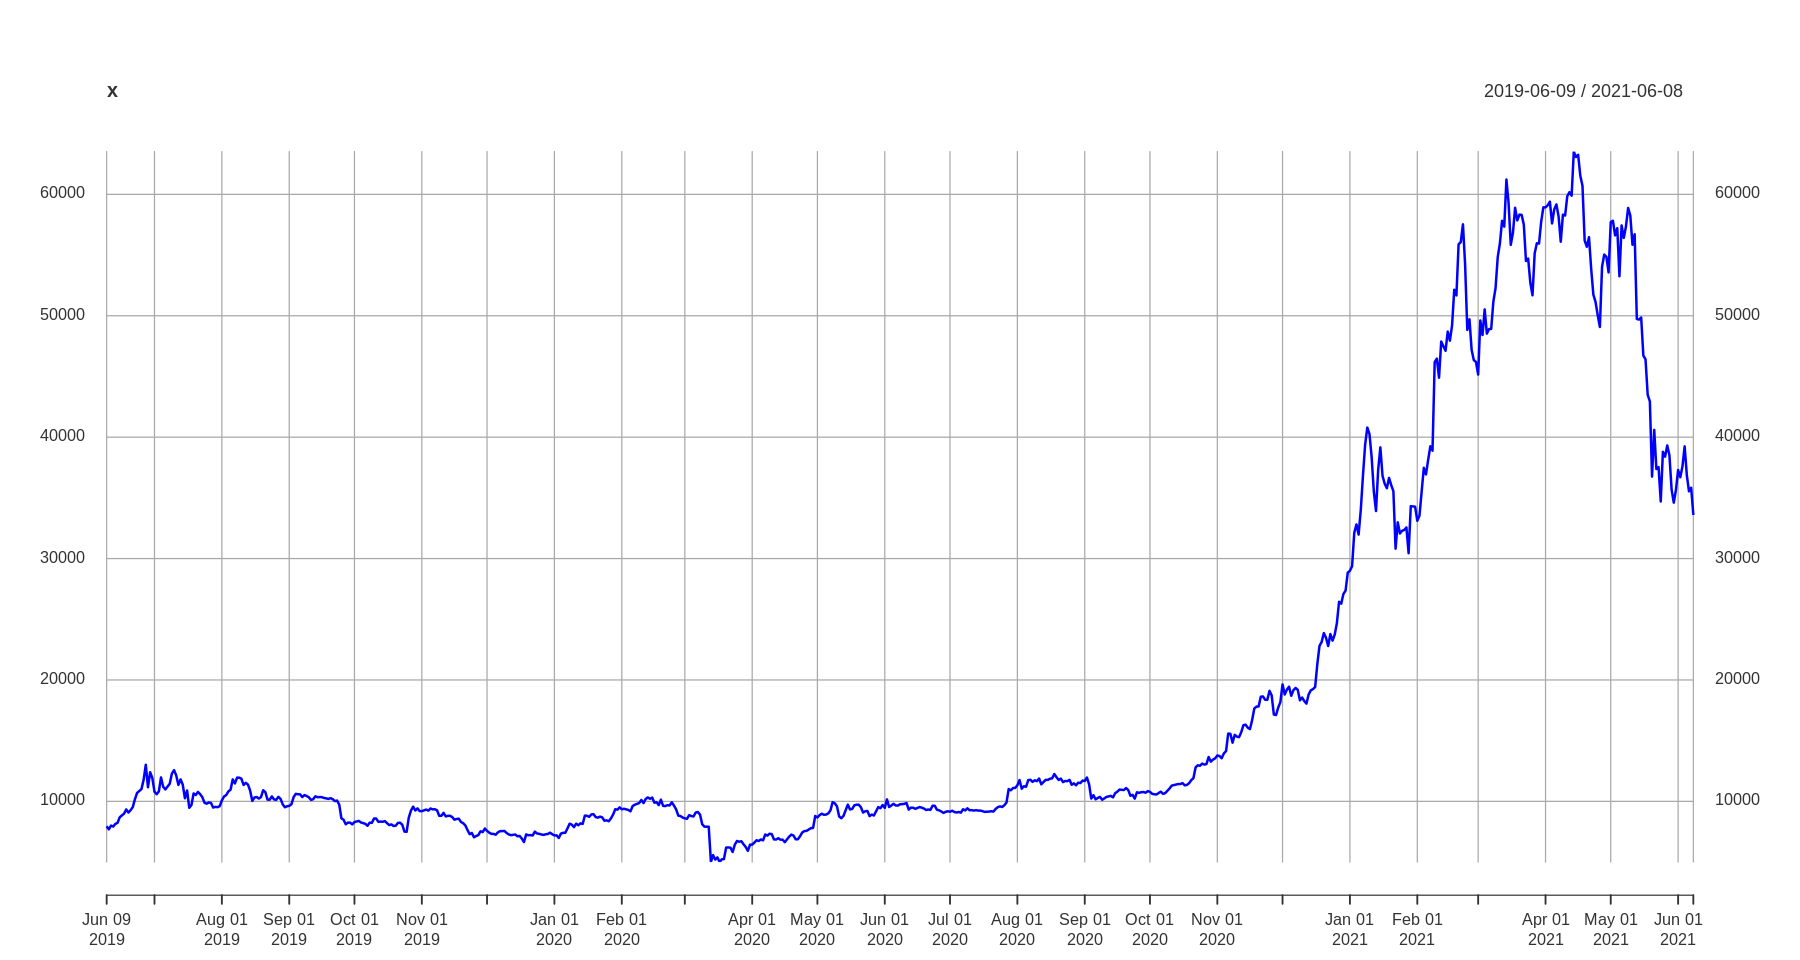

In [4]:
# conversión a serie temporal
df = na.omit(df) # todavía quedan NAs

x = xts(x=df$Open, order.by=df$Date)

plot.xts(x, col=4, lwd=2)

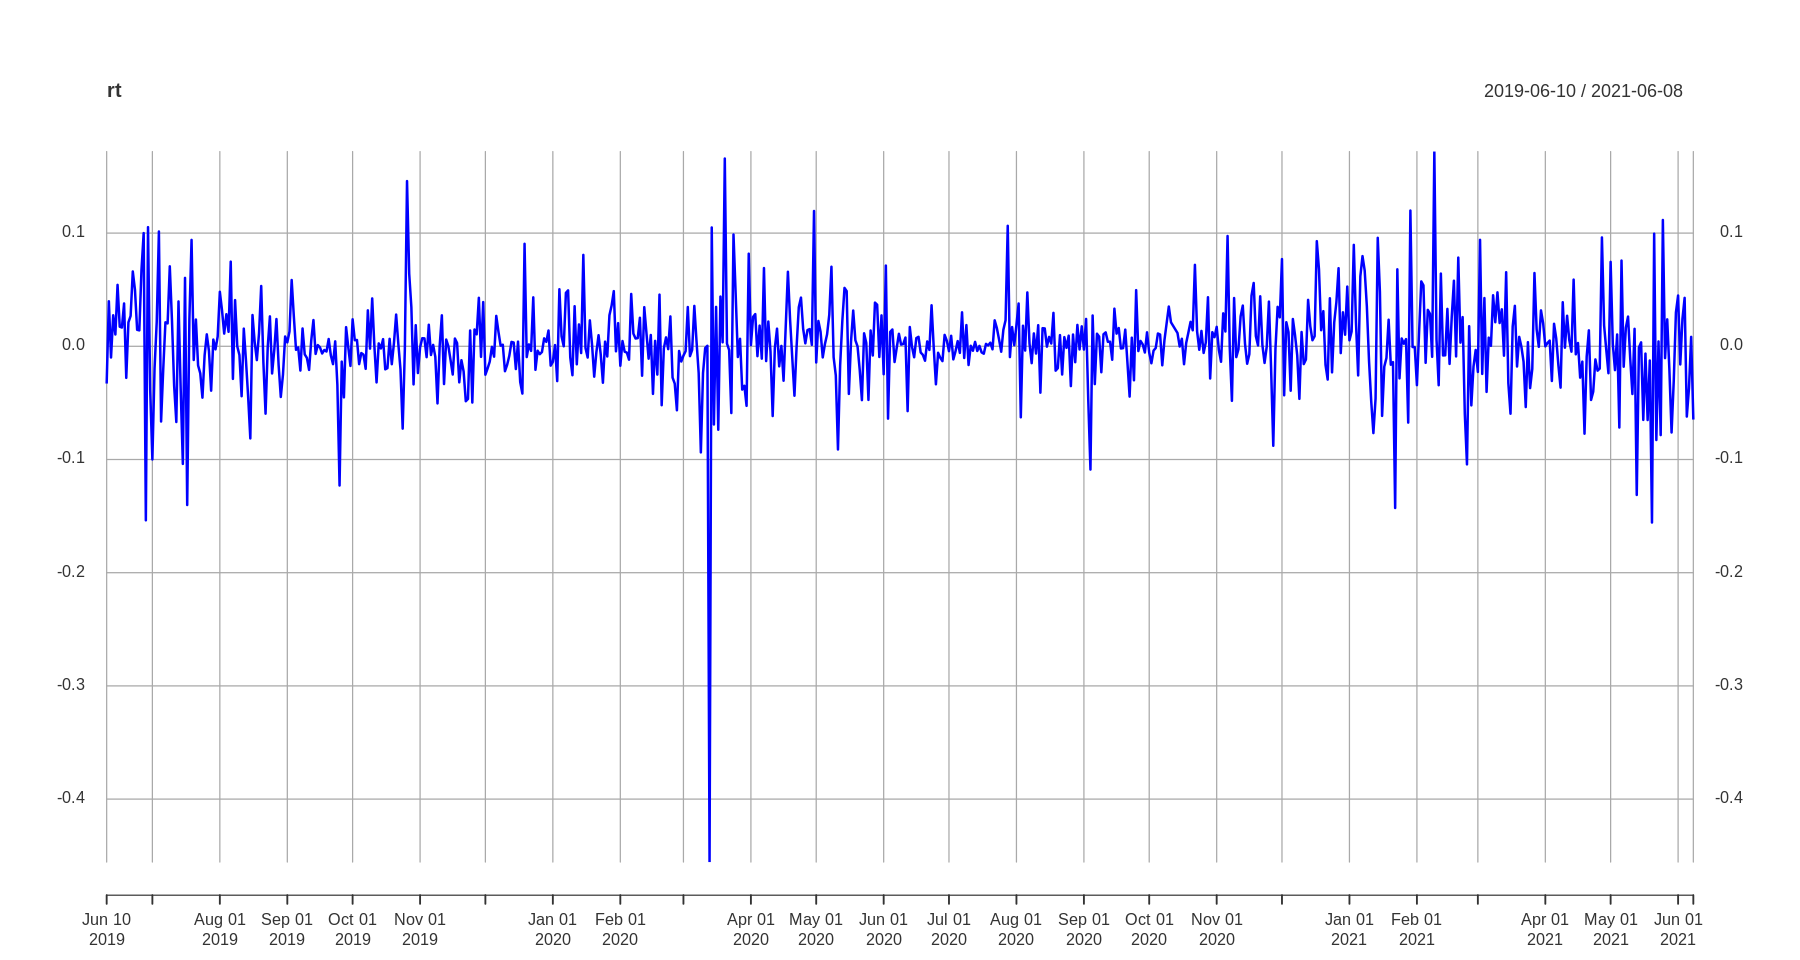

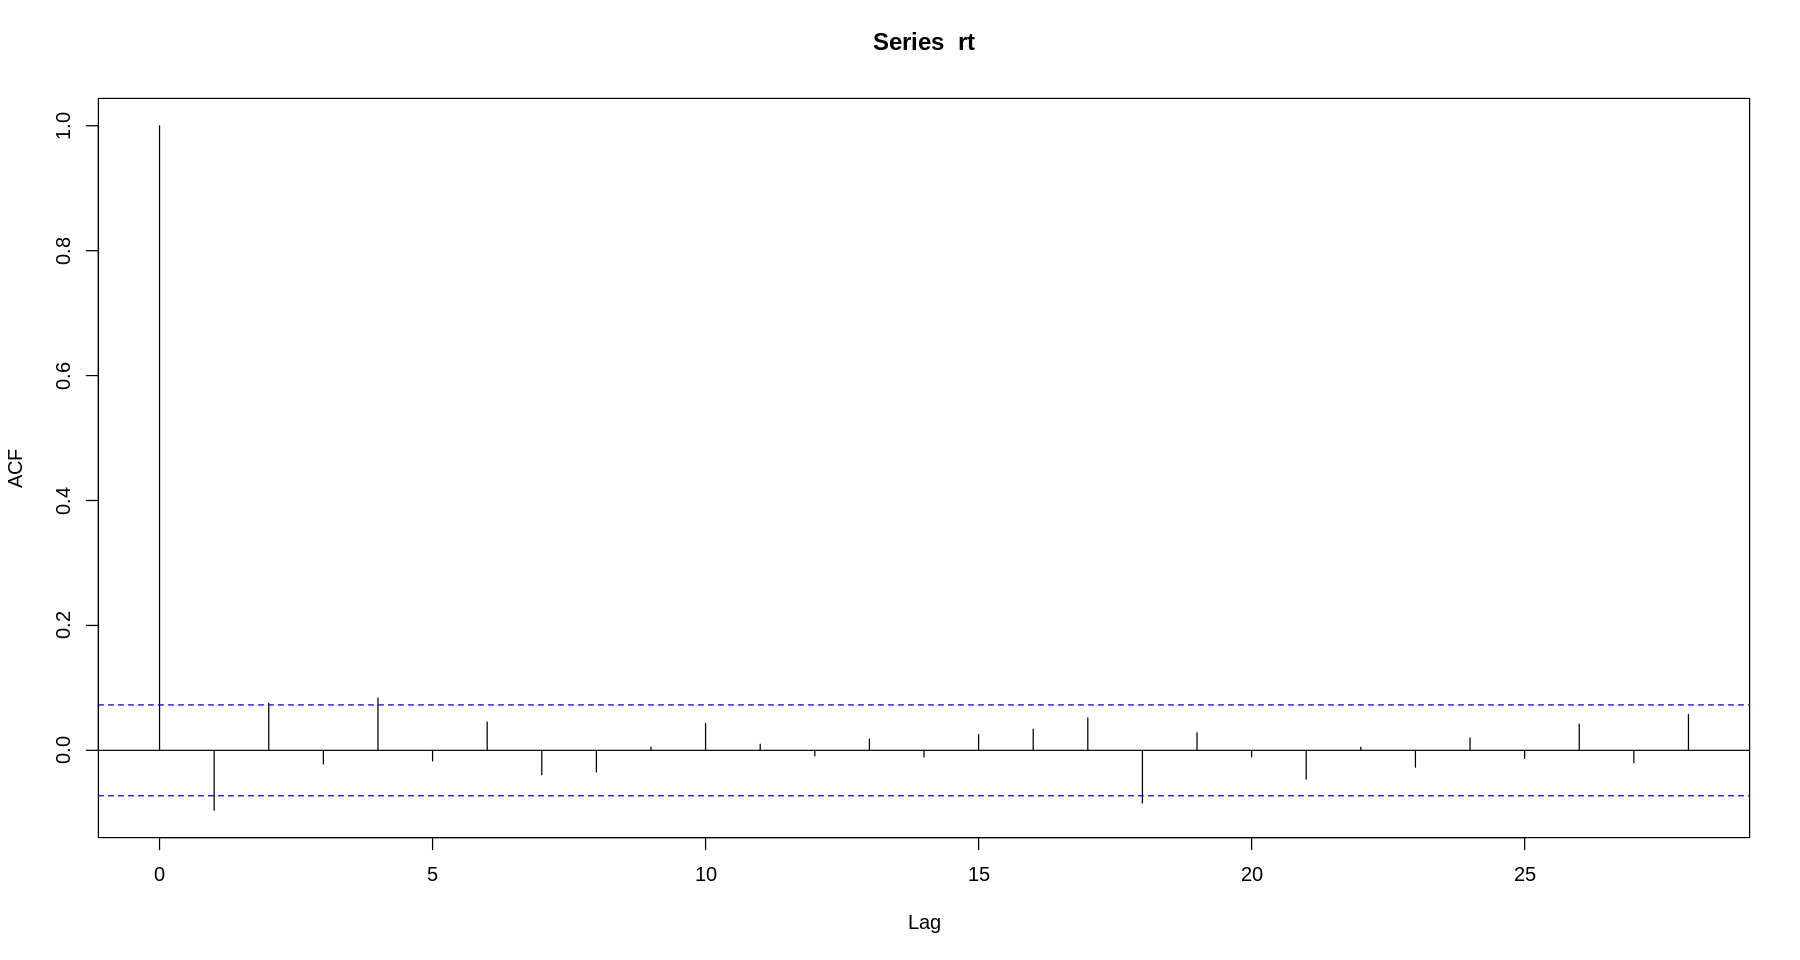

In [5]:
# se modela el retorno rt que es aprox log(x)-log(lag(x))
x_log=log(x)
rt=na.omit(diff(x_log))
plot(rt, col=4, lwd=2)
acf(rt) # para que sea estacionario la acf debe caer y no tener puntos altos con lag mayores

## 2. Modelos estadísticos

### ARIMA

In [6]:
fit = Arima(rt,order=c(1,1,1), include.drift=TRUE)
fit

Series: rt 
ARIMA(1,1,1) with drift 

Coefficients:
          ar1      ma1  drift
      -0.1079  -0.9829  0e+00
s.e.   0.0380   0.0105  1e-04

sigma^2 estimated as 0.001719:  log likelihood=1278.58
AIC=-2549.17   AICc=-2549.11   BIC=-2530.82

In [12]:
#falta encontrar cómo graficar las dos series juntas (original y el fit con ARIMA). Lo que viene son pruebas

n_series = ts.intersect(rt)
predictions = predict(fit, data=n_series)
#x_hat = predictions$pred
#x_hat
#prediction = fitted(fit)
#tsplot(x_log, col=4, lwd=2)
#tsplot(x_hat, col=2, lwd=2)

#plot(rt, col=4, lwd=2)
#lines (predictions)

ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'
